# DEAP Introdução
---
![image](https://deap.readthedocs.io/en/master/_images/deap_long.png)

* Distributed Evolutionary Algorithm in Python  is a evolutionary computation framework for rapid prototyping and testing of ideas.

* [DEAP](https://github.com/DEAP/deap) (Distributed Evolutionary Algorithm in Python) é um framework de computação evolutiva para prototipagem rápida e teste de ideias.

## Material Teórico Algoritmos Genéticos

* Youtube: [Genetic Algorithms by Example](https://www.youtube.com/watch?v=uQj5UNhCPuo)

* Medium: [Genetic Algorithms From Theory to Practice](https://medium.com/@atbender/from-theory-to-practice-designing-genetic-algorithms-to-solve-complex-optimization-problems-cbb2ae44296)

* Book: [Introduction to Genetic Algorithms -- Melanie Mitchell](https://www.boente.eti.br/fuzzy/ebook-fuzzy-mitchell.pdf)


## Instalando DEAP

In [1]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00


In [2]:
import warnings

# Estamos suprimindo um warning do DEAP que pode dificultar a visualização dos resultados
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Fitness

* Para definir funções de fitness, usamos `creator.create()`.

* A função `create()` recebe três argumentos: um nome para a nova classe criada, uma classe base e o atributo de pesos.

* A classe de fitness requer um parâmetro de pesos, que descreve os objetivos.

* O atributo de pesos deve ser uma tupla para que fitness de múltiplos objetivos e de objetivo único possam ser tratadas da mesma maneira.

* Abaixo, definimos uma função de maximização de objetivo único:

* Observe que tuplas de um único elemento em Python são definidas com uma vírgula no final.

In [3]:
from deap import base, creator

creator.create("Fitness", base.Fitness, weights=(1.0,))

* Uma fitness de minimização é construída usando pesos negativos, enquanto uma fitness de maximização tem pesos positivos.

* Podemos facilmente definir uma função de aptidão que maximize o primeiro objetivo e minimize o segundo.

In [4]:
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0))

* Os pesos podem ser usados para variar a importância de cada objetivo em relação aos outros.

In [5]:
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -2.0, 0.4, 1000.0))

## Indivíduo

* A forma como os indivíduos são definidos impacta fortemente um algoritmo genético.

* Indivíduos podem ser criados usando o `creator` e inicializados usando uma `Toolbox`.

* Vamos definir um indivíduo com 10 atributos de ponto flutuante e inicializá-lo aleatoriamente.

In [6]:
import random

from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

INDIVIDUAL_SIZE=10

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual",
                 tools.initRepeat,
                 creator.Individual,
                 toolbox.attr_float,
                 n=INDIVIDUAL_SIZE)

toolbox.individual()

[0.8571689850142057,
 0.3665444542510057,
 0.08149183709220353,
 0.06827824809225636,
 0.5713505832036141,
 0.9978749108448528,
 0.5800353559542475,
 0.6135799776264157,
 0.8539181539626083,
 0.3759483466759046]

* Da mesma forma, podemos alterar a função `random` para criar um indivíduo de permutação.

In [7]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

IND_SIZE=10

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)
toolbox.register("individual_sample",
                 tools.initIterate,
                 creator.Individual,
                 toolbox.indices)

toolbox.individual_sample()

[4, 5, 7, 2, 9, 8, 0, 3, 6, 1]

## População

* Populações são coleções de indivíduos.

In [8]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual_sample)
toolbox.population(n=5)

[[2, 7, 0, 9, 8, 3, 4, 5, 6, 1],
 [8, 7, 0, 6, 9, 5, 1, 2, 3, 4],
 [0, 3, 4, 2, 1, 7, 6, 5, 8, 9],
 [9, 7, 4, 1, 6, 0, 5, 3, 2, 8],
 [5, 7, 2, 3, 8, 9, 0, 6, 4, 1]]

* Outros tipos notáveis de população incluem [Grade](https://deap.readthedocs.io/en/master/tutorials/basic/part1.html#grid), [Enxame](https://deap.readthedocs.io/en/master/tutorials/basic/part1.html#swarm) e [Demes](https://deap.readthedocs.io/en/master/tutorials/basic/part1.html#demes).

## Avaliação

![image](https://www.researchgate.net/publication/316514846/figure/fig1/AS:487714714853376@1493291657451/Genetic-Algorithm-Evaluation-Flow.png)

* Ao inspecionar a avaliação de aptidão dos nossos indivíduos, podemos ver que sua avaliação permanece indefinida até que a alteremos.

In [9]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

INDIVIDUAL_SIZE=10

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual",
                 tools.initRepeat,
                 creator.Individual,
                 toolbox.attr_float,
                 n=INDIVIDUAL_SIZE)

individual = toolbox.individual()

print(individual)
print(individual.fitness.valid)
print(individual.fitness.values)

[0.6786546911797238, 0.7489070247311291, 0.7329552855468925, 0.9070957993293842, 0.6579125235795031, 0.32121396759470355, 0.9824173275797811, 0.7214294485988527, 0.9675922636972941, 0.12441031207419262]
False
()


* Aqui vamos criar uma avaliação que é simplesmente a soma de todos os atributos do indivíduo.

* Lembre-se de que a avaliação de aptidão dos indivíduos precisa ser uma tupla pelos mesmos motivos discutidos anteriormente.

In [10]:
def evaluate(individual):
    return (sum(individual),)

individual.fitness.values = evaluate(individual)

print(individual.fitness.valid)
print(individual.fitness)

True
(6.842588643911456,)


## Mutação

![image](https://www.researchgate.net/publication/272093243/figure/fig8/AS:329956690284546@1455679213204/Mutation-operators-applied-to-chromosomes-in-the-proposed-genetic-algorithm.png)

* Existem diversos operadores de mutação no módulo `deap.tools`.

* A regra geral para operadores de mutação é que eles apenas mutam.

* Uma cópia independente deve ser feita antes de mutar o indivíduo original se o indivíduo original precisar ser mantido.

* Para aplicar uma mutação (aqui uma mutação gaussiana), simplesmente utilize a função desejada.

In [11]:
mutant = toolbox.clone(individual)
mutant, = tools.mutGaussian(mutant, mu=0.0, sigma=0.2, indpb=0.2)

del mutant.fitness.values

print(individual)
print(mutant)

[0.6786546911797238, 0.7489070247311291, 0.7329552855468925, 0.9070957993293842, 0.6579125235795031, 0.32121396759470355, 0.9824173275797811, 0.7214294485988527, 0.9675922636972941, 0.12441031207419262]
[0.6786546911797238, 0.7489070247311291, 0.7329552855468925, 0.9070957993293842, 0.5466492155325755, 0.3338755074890768, 0.9824173275797811, 0.7214294485988527, 0.9675922636972941, 0.12441031207419262]


* Os valores de aptidão são deletados porque não estão mais relacionados ao indivíduo.

* A mutação não é responsável por invalidar a aptidão.

## Crossover

![image](https://d3i71xaburhd42.cloudfront.net/73a50124700c7b2e44e3a72a298f6279a8b54ac3/13-Figure2-1.png)

* Existem diversos operadores de crossover na [documentação](https://deap.readthedocs.io/en/master/api/tools.html#module-deap.tools).

* A regra geral para operadores de crossover é que eles apenas cruzam indivíduos.

* Cópias independentes devem ser feitas antes de cruzar os indivíduos originais se os indivíduos originais precisarem ser mantidos.

* Abaixo aplicamos uma operação de crossover para produzir os dois filhos que são clonados antecipadamente.

In [12]:
individual1, individual2 = toolbox.individual(), toolbox.individual()

print(individual1)
print(individual2)

child1, child2 = [toolbox.clone(ind) for ind in (individual1, individual2)]
tools.cxOnePoint(child1, child2)

del child1.fitness.values
del child2.fitness.values

print(child1)
print(child2)

[0.3388947089465548, 0.7585533551098804, 0.4042373987897805, 0.985297630785332, 0.21071546453838252, 0.3710297169915171, 0.003679779666331484, 0.6848482547308237, 0.08374207355506191, 0.46876928478692614]
[0.11869281135466248, 0.6681264391403915, 0.3314949316528454, 0.49394805909019424, 0.9562249098898598, 0.4987262363939149, 0.6331005722914216, 0.4293262244735011, 0.13985739425762533, 0.21970358595687733]
[0.3388947089465548, 0.7585533551098804, 0.4042373987897805, 0.985297630785332, 0.21071546453838252, 0.4987262363939149, 0.6331005722914216, 0.4293262244735011, 0.13985739425762533, 0.21970358595687733]
[0.11869281135466248, 0.6681264391403915, 0.3314949316528454, 0.49394805909019424, 0.9562249098898598, 0.3710297169915171, 0.003679779666331484, 0.6848482547308237, 0.08374207355506191, 0.46876928478692614]


## Seleção

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*Vxs3KzHbOpyEREA2Vo0WVA.jpeg)

* A seleção é feita entre uma população.

* Vários operadores de seleção estão disponíveis no módulo `deap.tools`.

* Ele retorna uma lista contendo as referências para os indivíduos selecionados.

In [13]:
selected = tools.selBest([child1, child2], 1)
print(child1 in selected)
print(child2 in selected)

True
False


* Normalmente, uma duplicação da população inteira é feita após a seleção.

In [14]:
offspring = [toolbox.clone(ind) for ind in selected]

## Toolbox and Algorithms

* Definindo objetivo e indivíduos:

In [15]:
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

INDIVIDUAL_SIZE = 10

toolbox = base.Toolbox()

toolbox.register("attr_float", random.random)
toolbox.register("individual",
                 tools.initRepeat,
                 creator.Individual,
                 toolbox.attr_float,
                 n=INDIVIDUAL_SIZE)

* Definindo avaliação e registrando operadores genéticos:

In [16]:
def evaluateInd(individual):
    return (sum(individual),)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluateInd)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

* Loop básico do algoritmo genético:

In [17]:
GENERATION_AMOUNT = 10
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.02

pop = toolbox.population(n=300)

for g in range(GENERATION_AMOUNT):
    offspring = toolbox.select(pop, len(pop))

    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CROSSOVER_PROBABILITY:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTATION_PROBABILITY:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = list(toolbox.map(toolbox.evaluate, invalid_ind))
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    fitnesses_values = list(map(lambda x: x[0], fitnesses))
    generation_average_fitness = sum(fitnesses_values) / len(fitnesses_values)
    print(f"Generation fitness: {generation_average_fitness:6.5f}")

    pop[:] = offspring

Generation fitness: 5.05528
Generation fitness: 4.29748
Generation fitness: 3.67206
Generation fitness: 2.99715
Generation fitness: 2.41952
Generation fitness: 1.95115
Generation fitness: 1.42842
Generation fitness: 0.84576
Generation fitness: -0.19249
Generation fitness: -1.28273


* Uma variação disso é usar `algorithms.varAnd`, que abstrai os operadores de variabilidade:

In [18]:
from deap import algorithms

GENERATION_AMOUNT = 10
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.02

pop = toolbox.population(n=300)

for g in range(GENERATION_AMOUNT):
    offspring = map(toolbox.clone, toolbox.select(pop, len(pop)))

    offspring = algorithms.varAnd(offspring,
                                  toolbox,
                                  CROSSOVER_PROBABILITY,
                                  MUTATION_PROBABILITY)

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = list(toolbox.map(toolbox.evaluate, invalid_ind))
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    fitnesses_values = list(map(lambda x: x[0], fitnesses))
    generation_average_fitness = sum(fitnesses_values) / len(fitnesses_values)
    print(f"Generation fitness: {generation_average_fitness:6.5f}")

    pop[:] = offspring

Generation fitness: 5.00476
Generation fitness: 4.26528
Generation fitness: 3.69160
Generation fitness: 3.06934
Generation fitness: 2.51297
Generation fitness: 2.16926
Generation fitness: 1.51873
Generation fitness: 0.71367
Generation fitness: -0.42421
Generation fitness: -1.46498


* Podemos simplificar ainda mais usando `algorithms.eaSimple`:

In [19]:
pop = toolbox.population(n=300)
population, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10)

gen	nevals
0  	300   
1  	195   
2  	184   
3  	184   
4  	183   
5  	161   
6  	176   
7  	183   
8  	202   
9  	190   
10 	193   


* Note que tais abstrações nos dão menos liberdade para registrar a aptidão das gerações.

* Neste formato, precisamos definir uma estatística e registrar métricas para salvar no logbook.

* Consulte a [documentação](https://deap.readthedocs.io/en/master/_modules/deap/algorithms.html#eaSimple).

In [20]:
stats = tools.Statistics(key=lambda fits: fits[0])
stats.register("avg", lambda fits: sum(fits) / len(fits))

logbook = tools.Logbook()

pop = toolbox.population(n=300)
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10,
                                          stats=stats, halloffame=None, verbose=True)

gen	nevals	avg     
0  	0     	-1.40145
1  	192   	-1.50912
2  	172   	-1.68788
3  	190   	-1.75961
4  	160   	-1.85029
5  	191   	-1.91087
6  	190   	-1.80381
7  	186   	-1.74177
8  	197   	-1.70992
9  	157   	-1.80453
10 	181   	-1.89885


## Exemplo de Problema Prático

Vamos projetar um algoritmo genético para resolver uma instância do Problema do Caixeiro Viajante (Traveling Salesman Problem - TSP).

As coordenadas das cidades são: (0, 0), (1, 1), (2, 0), (1, -1).

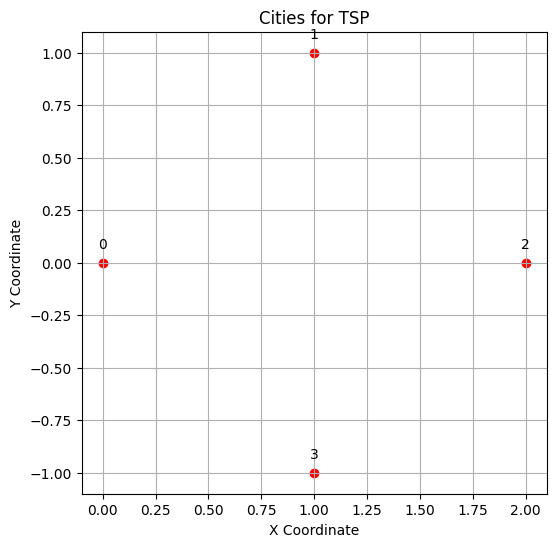

In [21]:
import matplotlib.pyplot as plt

cities = [(0, 0), (1, 1), (2, 0), (1, -1)]

x_coords, y_coords = zip(*cities)

plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color="red")

for i, (x, y) in enumerate(cities):
    plt.annotate(f"{i}", (x, y), textcoords="offset points", xytext=(0,10), ha="center")

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Cities for TSP")

plt.grid(True)
plt.show()

Antes de ler sobre a solução, como você modelaria os atributos do indivíduo para este problema?

### Solução

* Definimos a instância do problema usando as coordenadas das cidades.

* Definimos o cálculo da distância.

* Projetamos a função de avaliação que itera sobre as cidades e calcula suas distâncias.

* Definimos os indivíduos e os operadores genéticos. Aqui, nossos indivíduos são sequências de cidades.

* Rodamos o algoritmo genético.

In [22]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

cities = [(0, 0), (1, 1), (2, 0), (1, -1)]

def distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def evalTSP(individual):
    total_distance = sum(distance(cities[individual[i]], cities[individual[i + 1]]) for i in range(len(individual) - 1))
    total_distance += distance(cities[individual[-1]], cities[individual[0]])  # Return to start
    return (total_distance,)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(cities)), len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalTSP)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)

algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, verbose=False)

best_ind = tools.selBest(population, 1)[0]
best_route = [cities[i] for i in best_ind]

print(f"Best route is {best_route} with total distance {best_ind.fitness.values[0]}")

Best route is [(1, -1), (0, 0), (1, 1), (2, 0)] with total distance 5.656854249492381


# Exercícios
---

Abaixo você pode encontrar alguns exercícios para praticar o uso do framework.

## Exercício 1

No contexto dos exemplos acima, considere o seguinte:
* A aptidão é a soma dos atributos do indivíduo.
* Seus atributos são instanciados por `random.random()`.
* `random.random()` não retorna números negativos.

Como as médias de aptidão das gerações podem ser valores negativos?

In [23]:
all([random.random() > 0 for i in range(10_000)])

True

Como comentado no exercício a aptidão de um indivíduo é calculada como a soma de seus atributos, que inicialmente são gerados usando random.random(), resultando apenas em valores positivos. As etapas de seleção, avaliação de aptidão e recombinação não podem gerar valores negativos: a seleção apenas escolhe os melhores indivíduos, a avaliação de aptidão não modifica os valores dos atributos, e a recombinação apenas troca valores entre indivíduos.

A mutação, por outro lado, introduz variação nos atributos dos indivíduos de forma aleatória. Se a função de mutação escolhida permite a adição de valores negativos, como no caso de uma mutação gaussiana, os atributos dos indivíduos podem se tornar negativos. Além disso, ao configurar o problema para minimização, aptidões menores são preferíveis, resultando na seleção de indivíduos com aptidões negativas. Dessa forma, a combinação da mutação e da minimização pode levar a médias de aptidão negativas ao longo das gerações.

## Exercício 2

Crie um algoritmo genético para resolver o seguinte problema:

Os indivíduos devem ser permutações dos números [0,1,2,3,4,5,6,7,8,9]. A função objetivo é contar quantos números estão na posição correta (ordem crescente).

In [49]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

n = 10
def evalnumeros(individual):
  cont = 0
  soma_corretos = 0
  for num in individual:
    if num == cont:
      soma_corretos += 1
    cont += 1
  return (soma_corretos,)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", np.random.permutation, n)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalnumeros)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)

algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, verbose=False)

best_ind = tools.selBest(population, 1)[0]

print(f"Best is {best_ind}, {evalnumeros(best_ind)}")

Best is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], (10,)


## Exercício 3

Crie um algoritmo genético para resolver o seguinte problema:

Maximize a função `𝑓(𝑥,𝑦) = 𝑥 ⋅ 𝑦`, onde `x` e `y` são números de ponto flutuante no intervalo [0, 10].

Use diferentes operadores genéticos (seleção, crossover, mutação) dos utilizados nos exercícios anteriores.

In [25]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

def eval_func_xy(individual):
    x, y = individual
    return (x, y)

def cxBlendNew(ind1, ind2, alpha): # Modificando operador genético para não gerar valores fora do intervalo de 0 a 10
    for i, (x1, x2) in enumerate(zip(ind1, ind2)):
        gamma = (1. + 2. * alpha) * random.random() - alpha
        ind1[i] = (1. - gamma) * x1 + gamma * x2
        ind2[i] = gamma * x1 + (1. - gamma) * x2
        ind1[i] = min(max(ind1[i], 0), 10.0)
        ind2[i] = min(max(ind2[i], 0), 10.0)
    return ind1, ind2

creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", random.uniform, 0, 10)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.indices, toolbox.indices))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval_func_xy)
toolbox.register("mate", cxBlendNew, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0, up=10, eta=1.0, indpb=0.2)
toolbox.register("select", tools.selRoulette)

population = toolbox.population(n=50)

algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=10, verbose=False)

best_ind = tools.selBest(population, 1)[0]

print(f"Best is {best_ind}, {best_ind[0] * best_ind[1]}")

Best is [10.0, 7.359952650377416], 73.59952650377416


## Exercício 4

Crie um algoritmo genético multi-objetivo para resolver o seguinte problema:

Os indivíduos devem ser uma lista de `20` números de ponto flutuante no intervalo `[0,1]`.

Minimize a soma dos índices pares enquanto maximiza a soma dos índices ímpares nesta lista. Minimizar os índices pares é duas vezes mais importante do que minimizar os índices ímpares.

Use diferentes operadores genéticos (seleção, crossover, mutação) dos utilizados nos exercícios anteriores.

In [48]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

def eval_func_par_impar(individual):
  soma_par = 0
  soma_impar = 0
  for i in range(len(individual)):
    num = individual[i]
    if i % 2 == 0:
      soma_par += num
    else:
      soma_impar += num
  return(soma_par, soma_impar)

creator.create("FitnessMulti", base.Fitness, weights=(-2.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("indices", random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.indices, n=20)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval_func_par_impar)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0, up=1, eta=1.0, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

population = toolbox.population(n=50)

algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, verbose=False)

best_ind = tools.selBest(population, 1)[0]

result = eval_func_par_impar(best_ind)
print(f"Best is {best_ind} \n Soma indices pares: {result[0]} \n Soma indices impares: {result[1]}")

Best is [0.03978469744370494, 0.9689161543704655, 0.030775645289153886, 0.9320903487236003, 0.09654844522372763, 0.8410932580896259, 0.43281732372460824, 0.8945558183187353, 0.13183968223917153, 0.06788676359501788, 0.01932249208481096, 0.32348955764110654, 0.00561116774609105, 0.9781564067730653, 0.12035161309097109, 0.9999477428530916, 0.07138782592733084, 0.991918702727271, 0.1211826310830636, 0.9991650231596368] 
 Soma indices pares: 1.0696215238526339 
 Soma indices impares: 7.997219776251616


## Exercício 5

Escolha uma das implementações anteriores do algoritmo genético, registre a aptidão média ao longo das gerações e plote em um gráfico.

In [51]:
# exercicio 2

import matplotlib.pyplot as plt
import random
import numpy as np
from deap import base, creator, tools, algorithms

n = 10
def evalnumeros(individual):
  cont = 0
  soma_corretos = 0
  for num in individual:
    if num == cont:
      soma_corretos += 1
    cont += 1
  return (soma_corretos,)

def estatisticaSalvar(individual):
  return (individual.fitness.values)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("indices", np.random.permutation, n)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalnumeros)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)

estatistica = tools.Statistics(estatisticaSalvar)
estatistica.register("mean", np.mean)
estatistica.register("min", np.min)
estatistica.register("max", np.max)

hof = tools.HallOfFame(1)

result, log = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, verbose=True, stats=estatistica, halloffame=hof)

best_ind = tools.selBest(population, 1)[0]

print(f"Best is {best_ind}, {evalnumeros(best_ind)}")

gen	nevals	mean	min	max
0  	50    	0.98	0  	3  
1  	43    	1.84	0  	4  
2  	41    	2.2 	0  	4  
3  	40    	2.86	0  	7  
4  	32    	3.04	0  	7  
5  	43    	3.02	0  	7  
6  	34    	3.62	1  	7  
7  	33    	3.68	1  	7  
8  	41    	3.92	1  	7  
9  	34    	4.44	0  	7  
10 	41    	4.4 	1  	7  
11 	38    	5.68	0  	7  
12 	40    	6.7 	4  	7  
13 	35    	6.84	4  	7  
14 	35    	6.7 	4  	7  
15 	37    	6.98	5  	8  
16 	34    	6.98	5  	8  
17 	45    	6.62	2  	8  
18 	37    	7.1 	5  	8  
19 	39    	7.02	2  	8  
20 	39    	7.34	2  	8  
21 	38    	7.92	6  	8  
22 	38    	7.92	6  	8  
23 	34    	7.92	6  	8  
24 	36    	7.82	4  	8  
25 	40    	8   	7  	10 
26 	34    	8.06	3  	10 
27 	40    	8.44	3  	10 
28 	26    	9.44	8  	10 
29 	43    	9.72	6  	10 
30 	36    	9.88	6  	10 
31 	32    	9.96	8  	10 
32 	42    	9.78	7  	10 
33 	40    	9.84	8  	10 
34 	39    	9.96	8  	10 
35 	33    	9.74	7  	10 
36 	30    	9.62	6  	10 
37 	34    	9.68	8  	10 
38 	41    	9.96	8  	10 
39 	44    	9.84	8  	10 
40 	43    	9.92	

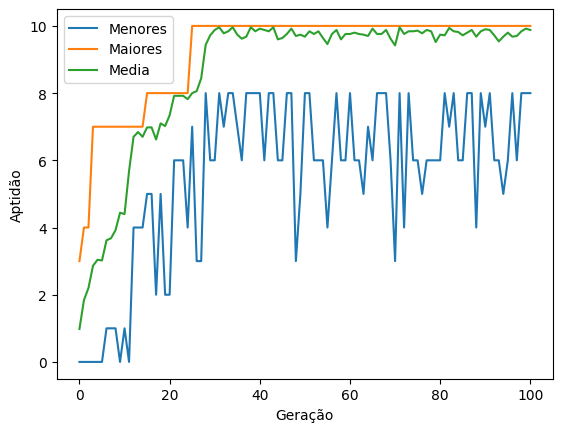

In [55]:
menores = log.select("min")
maiores = log.select("max")
media = log.select("mean")

plt.plot(menores, label="Menores")
plt.plot(maiores, label="Maiores")
plt.plot(media, label="Media")
plt.xlabel("Geração")
plt.ylabel("Aptidão")
plt.legend()